In [1]:
#Import basic libraries needed for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import warnings
warnings.filterwarnings("ignore")

#### <font color = red > 1. Load the dataset (5 points)</font>
    a. Tip: As the dataset is large, use fewer rows. Check what is working well on your machine and decide accordingly.

In [2]:
# Reading only few rows as data size is large (around 6.81lakh rows)
blogtext = pd.read_csv('blogtext.csv',nrows=10000)

In [3]:
print('There are {} rows and {} columns'.format(blogtext.shape[0],blogtext.shape[1]))

There are 10000 rows and 7 columns


In [4]:
blogtext.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [5]:
print("Columns in the data : \n",  blogtext.columns)

Columns in the data : 
 Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')


In [6]:
# Check data types
print(blogtext.dtypes)

id         int64
gender    object
age        int64
topic     object
sign      object
date      object
text      object
dtype: object


In [7]:
# Check for null values in the data
print("Number of null values in the data : ",blogtext.isnull().any().sum())

Number of null values in the data :  0


### <font color = blue >Exploratory Data Analysis (EDA) </font>

In [8]:
top_20 = blogtext.groupby(by='id')['id'].count().sort_values(ascending=False).head(20)

print("Top 20 Contributors : \n", top_20)


Top 20 Contributors : 
 id
589736     2294
883178     1616
2821801     605
1103575     558
766556      532
2581876     198
649790      191
2102033     180
4192173     172
2844168     146
1708471     139
3477296     137
1415200     131
3176655     119
3022585      85
3568056      75
2635745      74
3581210      70
2559416      62
3932072      60
Name: id, dtype: int64


male      5916
female    4084
Name: gender, dtype: int64


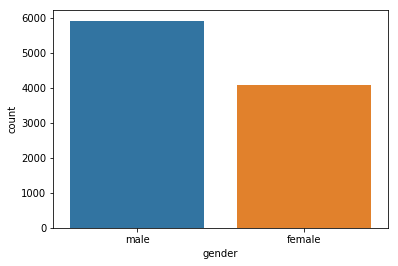

In [9]:
# Check 'Gender' distribution among bloggers
print(blogtext['gender'].value_counts())
sns.countplot(blogtext['gender'])


In [10]:
# Check 'Age' distribution among bloggers
blogtext['age'].value_counts()

35    2315
36    1708
17    1185
27    1054
24     655
15     602
34     553
16     440
25     386
23     253
26     234
14     212
33     136
39      79
38      46
13      42
37      33
41      20
45      16
42      14
46       7
43       6
44       3
40       1
Name: age, dtype: int64

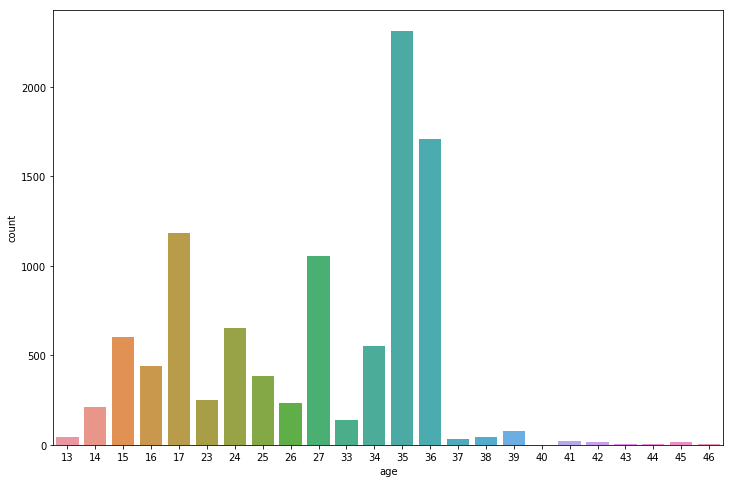

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(blogtext['age'])

In [12]:
# Check 'Topic' distribution
blogtext['topic'].value_counts()

indUnk                     3287
Technology                 2654
Fashion                    1622
Student                    1137
Education                   270
Marketing                   156
Engineering                 127
Internet                    118
Communications-Media         99
BusinessServices             91
Sports-Recreation            80
Non-Profit                   71
InvestmentBanking            70
Science                      63
Arts                         45
Consulting                   21
Museums-Libraries            17
Banking                      16
Automotive                   14
Law                          11
LawEnforcement-Security      10
Religion                      9
Publishing                    4
Accounting                    4
Telecommunications            2
HumanResources                2
Name: topic, dtype: int64

[Text(0, 0, 'indUnk'),
 Text(0, 0, 'Technology'),
 Text(0, 0, 'Fashion'),
 Text(0, 0, 'Student'),
 Text(0, 0, 'Education'),
 Text(0, 0, 'Marketing'),
 Text(0, 0, 'Engineering'),
 Text(0, 0, 'Internet'),
 Text(0, 0, 'Communications-Media'),
 Text(0, 0, 'BusinessServices'),
 Text(0, 0, 'Sports-Recreation'),
 Text(0, 0, 'Non-Profit'),
 Text(0, 0, 'InvestmentBanking'),
 Text(0, 0, 'Science'),
 Text(0, 0, 'Arts'),
 Text(0, 0, 'Consulting'),
 Text(0, 0, 'Museums-Libraries'),
 Text(0, 0, 'Banking'),
 Text(0, 0, 'Automotive'),
 Text(0, 0, 'Law'),
 Text(0, 0, 'LawEnforcement-Security'),
 Text(0, 0, 'Religion'),
 Text(0, 0, 'Publishing'),
 Text(0, 0, 'Accounting'),
 Text(0, 0, 'Telecommunications'),
 Text(0, 0, 'HumanResources')]

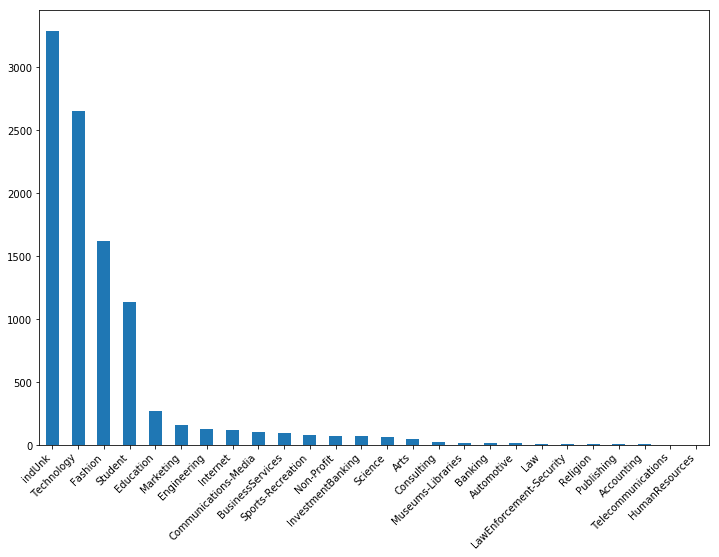

In [13]:
plt.figure(figsize=(12,8))

chart = blogtext['topic'].value_counts().plot(kind='bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [14]:
# Check 'Topic' distribution
blogtext['sign'].value_counts()

Aries          4198
Sagittarius    1097
Scorpio         971
Taurus          812
Aquarius        571
Cancer          504
Libra           491
Pisces          454
Leo             301
Virgo           236
Capricorn       215
Gemini          150
Name: sign, dtype: int64

[Text(0, 0, 'Aries'),
 Text(0, 0, 'Sagittarius'),
 Text(0, 0, 'Scorpio'),
 Text(0, 0, 'Taurus'),
 Text(0, 0, 'Aquarius'),
 Text(0, 0, 'Cancer'),
 Text(0, 0, 'Libra'),
 Text(0, 0, 'Pisces'),
 Text(0, 0, 'Leo'),
 Text(0, 0, 'Virgo'),
 Text(0, 0, 'Capricorn'),
 Text(0, 0, 'Gemini')]

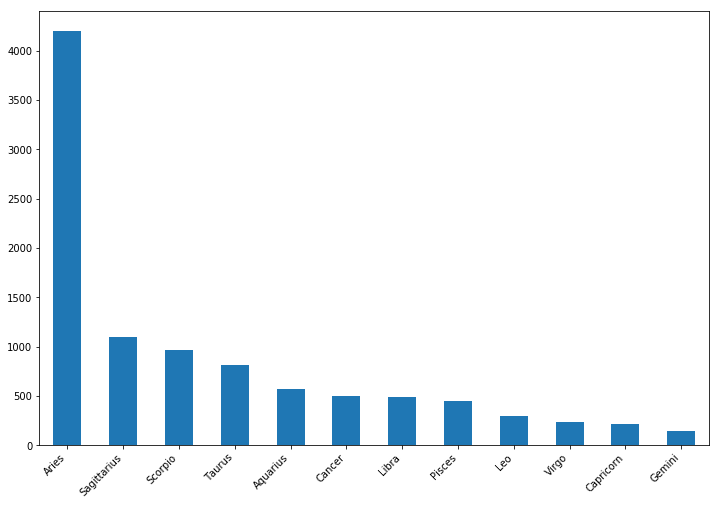

In [15]:
plt.figure(figsize=(12,8))

chart = blogtext['sign'].value_counts().plot(kind='bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

#### <font color = red > 2. Preprocess rows of the “text” column (7.5 points) </font>
#### <font color = red ><font color = red >    a. Remove unwanted characters </font>

In [16]:
import re
import nltk
from nltk.corpus import stopwords

In [17]:
def remove_unwanted_characters(text, remove_digits=False):
    #Using regex
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [18]:
blogtext['cleanText']=blogtext['text'].map(lambda s:remove_unwanted_characters(s)) 

In [19]:
blogtext.head()

,id,gender,age,topic,sign,date,text,cleanText
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",Info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,These are the team members Drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,Thanks to Yahoos Toolbar I can no...


In [20]:
blogtext.iloc[0]['text']

'           Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.         '

In [21]:
blogtext.iloc[0]['cleanText']

'           Info has been found  100 pages and 45 MB of pdf files Now i have to wait untill our team leader has processed it and learns html         '

#### <font color = red > b. Convert text to lowercase </font>

In [22]:
def convert_text_to_lowercase(text):
    text = text.lower()
    return text

In [23]:
blogtext['cleanText']=blogtext['cleanText'].map(lambda s:convert_text_to_lowercase(s)) 

In [24]:
blogtext.iloc[0]['cleanText']

'           info has been found  100 pages and 45 mb of pdf files now i have to wait untill our team leader has processed it and learns html         '

#### <font color = red > c. Remove unwanted spaces </font>

In [25]:
def remove_unwanted_spaces(text):
    text = ' '.join(filter(None,text.split(' ')))
    return text

'''Explanation:
        1. Split the entire string into a list.
        2. Filter empty elements from the list.
        3. Rejoin the remaining elements with a single space'''

'Explanation:\n        1. Split the entire string into a list.\n        2. Filter empty elements from the list.\n        3. Rejoin the remaining elements with a single space'

In [26]:
blogtext['cleanText']=blogtext['cleanText'].map(lambda s:remove_unwanted_spaces(s)) 

In [27]:
blogtext.iloc[1]['text']

'           These are the team members:   Drewes van der Laag           urlLink mail  Ruiyu Xie                     urlLink mail  Bryan Aaldering (me)          urlLink mail          '

In [28]:
blogtext.iloc[1]['cleanText']

'these are the team members drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering me urllink mail'

#### <font color = red > d. Remove stopwords </font>

In [29]:
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize

In [30]:
stop_words = stopwords.words('english') + list(punctuation)

In [31]:
def remove_stopwords(text):
    words = word_tokenize(text)
    words = [w for w in words if w not in stop_words and not w.isdigit()]
    words = (" ").join(words)
    return words

In [32]:
blogtext.iloc[0]['cleanText']

'info has been found 100 pages and 45 mb of pdf files now i have to wait untill our team leader has processed it and learns html'

In [33]:
blogtext['cleanText']=blogtext['cleanText'].map(lambda s:remove_stopwords(s)) 

In [34]:
blogtext.iloc[0]['cleanText']

'info found pages mb pdf files wait untill team leader processed learns html'

In [35]:
blogtext.head()

,id,gender,age,topic,sign,date,text,cleanText
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",info found pages mb pdf files wait untill team...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,team members drewes van der laag urllink mail ...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,thanks yahoos toolbar capture urls popupswhich...


#### <font color = red >3. As we want to make this into a multi-label classification problem, you are required to merge all the label columns together, so that we have all the labels together for a particular sentence (7.5 points) </font>
    a. Label columns to merge: “gender”, “age”, “topic”, “sign”
    b. After completing the previous step, there should be only two columns in your data frame i.e. “text” and “labels” as shown in the below image

In [36]:
blogtext["labels"] = blogtext[["gender","age","topic","sign"]].apply(lambda row: list(row),axis=1)

In [37]:
blogtext.drop(["id","gender","age","topic","sign","date","text"],axis=1,inplace=True)

In [38]:
blogtext.head()

,cleanText,labels
0,info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


#### <font color = red >4. Separate features and labels, and split the data into training and testing (5 points) </font>

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(blogtext.cleanText, blogtext.labels,test_size=0.20, random_state=1)

In [41]:
#Traing data
print(X_train.shape)
print(y_train.shape)

(8000,)
(8000,)


In [42]:
#Test Data
print(X_test.shape)
print(y_test.shape)

(2000,)
(2000,)


#### <font color = red >5. Vectorize the features (5 points) </font>
    a. Create a Bag of Words using count vectorizer
        i. Use ngram_range=(1, 2)
        ii. Vectorize training and testing features
    b. Print the term-document matrix

In [43]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1, 2))

In [44]:
# create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [45]:
#Check the vocablury size
len(vect.vocabulary_)

564952

In [46]:
# examine the fitted vocabulary
vect.get_feature_names()

['03my',
 '03my life',
 '04but',
 '04but couldnt',
 '04yet',
 '04yet another',
 '06th',
 '06th height',
 '0830am',
 '0830am asking',
 '0nbsp',
 '0nbsp think',
 '0o',
 '0o well',
 '0s',
 '0s 12s',
 '10000th',
 '10000th time',
 '1000pm',
 '1000pm currently',
 '100am',
 '100am know',
 '100days',
 '100days celebration',
 '100feettall',
 '100feettall pictures',
 '100gb',
 '100gb drives',
 '100kg',
 '100kg dakaka',
 '100m',
 '100m breastroke',
 '100m butterfly',
 '100m dash',
 '100m finals',
 '100m oksounded',
 '100m sprint',
 '100nbsp',
 '100nbsp months',
 '100night',
 '100night festival',
 '100peeercent',
 '100peeercent behind',
 '100plus',
 '100plus fiesta',
 '100pm',
 '100pm till',
 '100pre',
 '100pre hacen',
 '100something',
 '100something want',
 '100th',
 '100th attempt',
 '100th birthday',
 '100th post',
 '100th store',
 '100x',
 '100x better',
 '100x popular',
 '1010pm',
 '1010pm first',
 '1015am',
 '1015am jogs',
 '101st',
 '101st airborne',
 '1030am',
 '1030am 230pm',
 '1030am eve

In [47]:
# check the type of the document-term matrix
print(type(X_train_dtm))

# examine the sparse matrix contents
# represented coordinates, and the values at that coordinates
print(X_train_dtm)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 789)	1
  (0, 254656)	1
  (0, 228328)	1
  (0, 548)	1
  (0, 254654)	1
  (0, 420665)	1
  (0, 412174)	1
  (0, 418088)	1
  (0, 66859)	1
  (0, 412060)	1
  (0, 287080)	1
  (0, 509364)	1
  (0, 780)	1
  (0, 228326)	1
  (0, 545)	1
  (0, 254647)	2
  (0, 420659)	1
  (0, 412166)	1
  (0, 417737)	1
  (0, 66835)	1
  (0, 412059)	1
  (0, 286854)	1
  (1, 113760)	1
  (1, 343508)	1
  (1, 316026)	1
  :	:
  (7998, 28730)	1
  (7998, 483287)	1
  (7998, 176126)	1
  (7998, 464824)	1
  (7998, 401010)	1
  (7998, 538052)	1
  (7998, 290810)	1
  (7998, 419465)	1
  (7998, 281677)	1
  (7998, 431759)	1
  (7998, 563977)	1
  (7998, 531490)	1
  (7998, 295734)	1
  (7998, 530498)	1
  (7998, 511603)	1
  (7998, 302929)	1
  (7998, 499647)	1
  (7998, 112369)	2
  (7998, 33884)	1
  (7998, 200768)	1
  (7998, 514827)	1
  (7998, 449190)	1
  (7999, 134608)	1
  (7999, 134519)	1
  (7999, 546656)	1


In [48]:
# examine the vocabulary and document-term matrix together
# pd.DataFrame(matrix, columns=columns)
# pd.DataFrame(X_train_dtm.toarray(), columns=vect.get_feature_names()) // getting memory error as data is huge


In [49]:
# Print X_test_dtm
print(X_test_dtm)

  (0, 2905)	1
  (0, 22149)	1
  (0, 22223)	1
  (0, 69864)	1
  (0, 70056)	1
  (0, 74134)	1
  (0, 74374)	1
  (0, 113632)	1
  (0, 116354)	1
  (0, 116395)	1
  (0, 141224)	1
  (0, 143468)	1
  (0, 143755)	1
  (0, 151755)	1
  (0, 152025)	1
  (0, 160268)	1
  (0, 160352)	1
  (0, 179135)	1
  (0, 187178)	1
  (0, 188597)	1
  (0, 188628)	1
  (0, 188961)	2
  (0, 189185)	1
  (0, 214837)	5
  (0, 214979)	2
  :	:
  (1998, 81906)	1
  (1998, 145328)	1
  (1998, 149250)	1
  (1998, 168198)	1
  (1998, 183296)	1
  (1998, 234090)	1
  (1998, 234251)	1
  (1998, 298140)	1
  (1998, 298461)	1
  (1998, 302620)	1
  (1998, 309782)	1
  (1998, 309888)	1
  (1998, 318611)	1
  (1998, 350017)	1
  (1998, 358835)	1
  (1998, 373315)	1
  (1998, 377097)	1
  (1998, 417737)	1
  (1998, 417877)	1
  (1998, 462262)	1
  (1998, 508861)	1
  (1999, 8742)	1
  (1999, 397849)	1
  (1999, 460953)	2
  (1999, 485948)	1


In [50]:
#What is there in the vocabulary
vect.vocabulary_

{'looking': 286854,
 'rpg': 412059,
 'calendar': 66835,
 'saw': 417737,
 'rtg': 412166,
 'scheduled': 420659,
 'july': 254647,
 '19th': 545,
 'hos': 228326,
 '20th': 780,
 'true': 509364,
 'looking rpg': 287080,
 'rpg calendar': 412060,
 'calendar saw': 66859,
 'saw rtg': 418088,
 'rtg scheduled': 412174,
 'scheduled july': 420665,
 'july 19th': 254654,
 '19th hos': 548,
 'hos july': 228328,
 'july 20th': 254656,
 '20th true': 789,
 'well': 540165,
 'coming': 90649,
 'year': 559548,
 'blogging': 53088,
 'think': 490268,
 'little': 281867,
 'crazy': 104832,
 'yup': 564341,
 'keep': 256219,
 'waking': 530430,
 'one': 343077,
 'morning': 316461,
 'strong': 467227,
 'desire': 120191,
 'something': 449190,
 'rachels': 389347,
 'often': 340398,
 'love': 289509,
 'cant': 69864,
 'tell': 482624,
 'would': 554450,
 'muchas': 321074,
 'usual': 523948,
 'im': 235964,
 'moods': 316021,
 'days': 113661,
 'cry': 107005,
 'well coming': 540303,
 'coming year': 90923,
 'year blogging': 559603,
 'blogg

In [51]:
#Convert Training X_train into Count Vectors
X_train_ct = vect.transform(X_train)

In [52]:
#Size of Document Term Matrix
X_train_ct.shape

(8000, 564952)

In [53]:
#Let's check the first record of X_train
print(X_train_ct[0])

  (0, 545)	1
  (0, 548)	1
  (0, 780)	1
  (0, 789)	1
  (0, 66835)	1
  (0, 66859)	1
  (0, 228326)	1
  (0, 228328)	1
  (0, 254647)	2
  (0, 254654)	1
  (0, 254656)	1
  (0, 286854)	1
  (0, 287080)	1
  (0, 412059)	1
  (0, 412060)	1
  (0, 412166)	1
  (0, 412174)	1
  (0, 417737)	1
  (0, 418088)	1
  (0, 420659)	1
  (0, 420665)	1
  (0, 509364)	1


In [54]:
X_test_ct = vect.transform(X_test)

In [55]:
X_test_ct.shape

(2000, 564952)

In [56]:
#Let's check the first record of X_test
print(X_test_ct[0])

  (0, 2905)	1
  (0, 22149)	1
  (0, 22223)	1
  (0, 69864)	1
  (0, 70056)	1
  (0, 74134)	1
  (0, 74374)	1
  (0, 113632)	1
  (0, 116354)	1
  (0, 116395)	1
  (0, 141224)	1
  (0, 143468)	1
  (0, 143755)	1
  (0, 151755)	1
  (0, 152025)	1
  (0, 160268)	1
  (0, 160352)	1
  (0, 179135)	1
  (0, 187178)	1
  (0, 188597)	1
  (0, 188628)	1
  (0, 188961)	2
  (0, 189185)	1
  (0, 214837)	5
  (0, 214979)	2
  :	:
  (0, 223025)	1
  (0, 232254)	1
  (0, 235306)	2
  (0, 235560)	1
  (0, 235964)	1
  (0, 236522)	1
  (0, 289509)	3
  (0, 289553)	1
  (0, 290532)	1
  (0, 290979)	1
  (0, 316376)	1
  (0, 319898)	1
  (0, 329027)	1
  (0, 329029)	1
  (0, 348973)	1
  (0, 349016)	1
  (0, 363268)	1
  (0, 404053)	1
  (0, 440731)	1
  (0, 462663)	1
  (0, 470436)	1
  (0, 485903)	1
  (0, 485913)	1
  (0, 531490)	1
  (0, 531767)	1


<font color = red ><p><strong>6. Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. Check below image for reference (5 points) 
    <br><img src="https://drive.google.com/thumbnail?id=1bB_Kp1V5QzUBdLQcfERe7aj-_Uq1iHoO" alt="dictionary_sample_image" align="left"></p></font></strong>


In [57]:
from collections import defaultdict

In [58]:
label_counts = defaultdict(int)
labels = blogtext['labels']

In [59]:
for row in labels:
    for element in row:
        label_counts[element] += 1 #increment if found

In [60]:
isinstance(label_counts, dict)

True

In [61]:
label_dict = dict(label_counts)

label_dict

{'male': 5916,
 15: 602,
 'Student': 1137,
 'Leo': 301,
 33: 136,
 'InvestmentBanking': 70,
 'Aquarius': 571,
 'female': 4084,
 14: 212,
 'indUnk': 3287,
 'Aries': 4198,
 25: 386,
 'Capricorn': 215,
 17: 1185,
 'Gemini': 150,
 23: 253,
 'Non-Profit': 71,
 'Cancer': 504,
 'Banking': 16,
 37: 33,
 'Sagittarius': 1097,
 26: 234,
 24: 655,
 'Scorpio': 971,
 27: 1054,
 'Education': 270,
 45: 16,
 'Engineering': 127,
 'Libra': 491,
 'Science': 63,
 34: 553,
 41: 20,
 'Communications-Media': 99,
 'BusinessServices': 91,
 'Sports-Recreation': 80,
 'Virgo': 236,
 'Taurus': 812,
 'Arts': 45,
 'Pisces': 454,
 44: 3,
 16: 440,
 'Internet': 118,
 'Museums-Libraries': 17,
 'Accounting': 4,
 39: 79,
 35: 2315,
 'Technology': 2654,
 36: 1708,
 'Law': 11,
 46: 7,
 'Consulting': 21,
 'Automotive': 14,
 42: 14,
 'Religion': 9,
 13: 42,
 'Fashion': 1622,
 38: 46,
 43: 6,
 'Publishing': 4,
 40: 1,
 'Marketing': 156,
 'LawEnforcement-Security': 10,
 'HumanResources': 2,
 'Telecommunications': 2}

In [62]:
len(label_dict)

64

#### <font color = red >7. Transform the labels - (7.5 points)</font>
As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn <br>a. Convert your train and test labels using MultiLabelBinarizer

In [63]:
from sklearn.preprocessing import MultiLabelBinarizer
# Create MultiLabelBinarizer object
mlb = MultiLabelBinarizer(classes=list(label_dict.keys()))

In [64]:
# Fit and transform
labels_train_enc = mlb.fit_transform(y_train)

In [65]:
# Encode labels
labels_test_enc = mlb.transform(y_test)

In [66]:
# View classes
mlb.classes_

array(['male', 15, 'Student', 'Leo', 33, 'InvestmentBanking', 'Aquarius',
       'female', 14, 'indUnk', 'Aries', 25, 'Capricorn', 17, 'Gemini', 23,
       'Non-Profit', 'Cancer', 'Banking', 37, 'Sagittarius', 26, 24,
       'Scorpio', 27, 'Education', 45, 'Engineering', 'Libra', 'Science',
       34, 41, 'Communications-Media', 'BusinessServices',
       'Sports-Recreation', 'Virgo', 'Taurus', 'Arts', 'Pisces', 44, 16,
       'Internet', 'Museums-Libraries', 'Accounting', 39, 35,
       'Technology', 36, 'Law', 46, 'Consulting', 'Automotive', 42,
       'Religion', 13, 'Fashion', 38, 43, 'Publishing', 40, 'Marketing',
       'LawEnforcement-Security', 'HumanResources', 'Telecommunications'],
      dtype=object)

In [67]:
# Encoded train labels
print(labels_train_enc.shape)
print(labels_train_enc)

(8000, 64)
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [68]:
# Encoded test labels
print(labels_test_enc.shape)
print(labels_test_enc)

(2000, 64)
[[0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


#### <font color = red >8. Choose a classifier - (5 points) </font>
In this task, we suggest using the One-vs-Rest approach, which is implemented in OneVsRestClassifier class. In this approach k classifiers (= number of tags) are trained. As a basic classifier, use LogisticRegression. It is one of the simplest methods, but often it performs good enough in text classification tasks. It might take some time because the number of classifiers to train is large.<br>
    a. Use a linear classifier of your choice, wrap it up in OneVsRestClassifier to train it on every label<br>
    b. As One-vs-Rest approach might not have been discussed in the sessions, we are providing you the code for that

<img src="https://drive.google.com/thumbnail?id=1vE-08mE8dTSQwZO-2Zv3J4BiFtlG5V7w" alt="One_vs_Rest_image" align="left" width="500" height="500"></p>

In [69]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs')
clf = OneVsRestClassifier(estimator = clf)

In [70]:
# fit the model with data 
clf.fit(X_train_ct, labels_train_enc)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

#### <font color = red >9. Fit the classifier, make predictions and get the accuracy (5 points)</font>
    a. Print the following
        i. Accuracy score
        ii. F1 score
        iii. Average precision score
        iv. Average recall score
        v. Tip: Make sure you are familiar with all of them. How would you expect the 
        things to work for the multi-label scenario? Read about micro/macro/weighted averaging

In [71]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

Evaluation on Test Dataset

In [72]:
labels_pred = clf.predict(X_test_ct)

In [73]:
#Calculate accuracy on Test Dataset
print("Accuracy Score : ",accuracy_score(labels_test_enc, labels_pred ))

Accuracy Score :  0.3025


In [74]:
# micro/macro/weighted averaging
avg = ["macro","micro","weighted"]

In [75]:
for a in avg:
    print(f'F1 Score ({a}) : {f1_score(labels_test_enc,labels_pred,average=a): 0.3f}')

F1 Score (macro) :  0.247
F1 Score (micro) :  0.633
F1 Score (weighted) :  0.593


In [77]:
for a in avg:
    print(f'Precision ({a}) : {precision_score(labels_test_enc,labels_pred,average=a): 0.3f}')

Precision (macro) :  0.518
Precision (micro) :  0.784
Precision (weighted) :  0.777


In [78]:
for a in avg:
    print(f'Recall ({a}) : {recall_score(labels_test_enc,labels_pred,average=a): 0.3f}')

Recall (macro) :  0.188
Recall (micro) :  0.531
Recall (weighted) :  0.531


In [79]:
#Classification Report

print("Classification Report")
print(classification_report(labels_test_enc,labels_pred,target_names=[str(x) for x in mlb.classes]))

Classification Report
                         precision    recall  f1-score   support

                   male       0.79      0.88      0.83      1190
                     15       0.74      0.21      0.33       108
                Student       0.66      0.30      0.41       203
                    Leo       0.75      0.05      0.10        58
                     33       0.89      0.32      0.47        25
      InvestmentBanking       1.00      0.42      0.59        12
               Aquarius       0.82      0.34      0.48       105
                 female       0.79      0.66      0.72       810
                     14       0.80      0.08      0.15        48
                 indUnk       0.75      0.52      0.61       661
                  Aries       0.76      0.80      0.78       840
                     25       0.60      0.04      0.07        76
              Capricorn       1.00      0.15      0.27        52
                     17       0.80      0.32      0.45       230
  

#### <font color = red >10. Print true label and predicted label for any five examples (7.5 points)</font>

Using random function to select 5 random data

In [80]:
k=5
seed=4
random.seed(seed)
print ('Actual Vs predicted')
#Generate 5 random numbers between 10 and 2000
random_list = random.sample(range(10, 400),k)

for i in random_list :
    print ('\n\nTest Sample no : {} '.format(i))
    print('Actual    : ',mlb.inverse_transform(labels_test_enc)[i])
    print('Predicted : ',mlb.inverse_transform(labels_pred)[i])

Actual Vs predicted


Test Sample no : 130 
Actual    :  ('female', 'Aries', 'Internet', 36)
Predicted :  ('female', 'indUnk')


Test Sample no : 165 
Actual    :  ('male', 'Student', 'Pisces', 16)
Predicted :  ('male', 'indUnk')


Test Sample no : 62 
Actual    :  ('female', 'Sagittarius', 'Internet', 38)
Predicted :  ('female', 'indUnk')


Test Sample no : 379 
Actual    :  ('male', 'Education', 'Virgo', 39)
Predicted :  ('male', 'Aries', 'Technology')


Test Sample no : 212 
Actual    :  ('male', 'Aries', 35, 'Technology')
Predicted :  ('male', 'Aries', 35, 'Technology')
